### An example showing the plot_feature_importances method used by a scikit-learn classifier

In this example, we'll be plotting a `feature_importances` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.estimators.plot_feature_importances` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

# Import scikit-plot
import scikitplot as skplt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

array(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'], dtype=object)

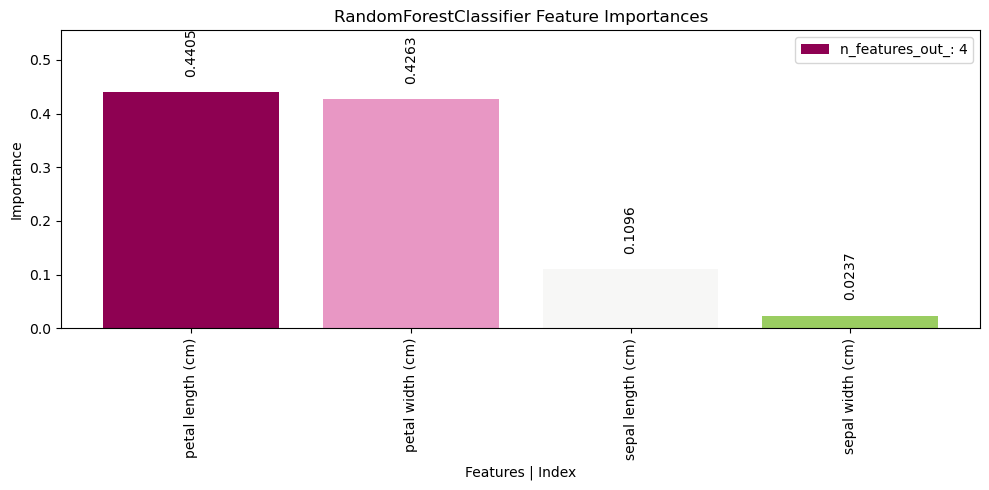

In [3]:
# Create an instance of the LogisticRegression
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)

# Plot!
ax, features = skplt.estimators.plot_feature_importances(
    model, 
    # feature_names=['petal length', 'petal width', 'sepal length', 'sepal width'],
);

features

In [4]:
dict( zip(model.feature_importances_, model.feature_names_in_) )

{0.10957240106587678: 'sepal length (cm)',
 0.023672140772396162: 'sepal width (cm)',
 0.4405042679643881: 'petal length (cm)',
 0.4262511901973389: 'petal width (cm)'}

## Catboost

In [5]:
# !pip install catboost -Uq
import catboost
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

### Generate synthetic dataset

In [6]:
X, Y = make_multilabel_classification(n_samples=500, n_features=20, n_classes=5, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

train_pool = Pool(X_train, Y_train)
test_pool = Pool(X_test, Y_test)

In [7]:
X_train

array([[2., 4., 3., ..., 6., 5., 2.],
       [2., 1., 1., ..., 1., 1., 4.],
       [1., 4., 2., ..., 5., 1., 3.],
       ...,
       [4., 2., 1., ..., 2., 5., 1.],
       [4., 2., 3., ..., 2., 4., 2.],
       [3., 7., 2., ..., 5., 3., 3.]])

### Train model

In [8]:
clf = CatBoostClassifier(
    loss_function='MultiLogloss',
    eval_metric='HammingLoss',
    iterations=500,
    class_names=['A', 'B', 'C', 'D', 'E']
)
%time clf.fit(train_pool, eval_set=test_pool, metric_period=10, plot=False, verbose=50)

Learning rate set to 0.033623
0:	learn: 0.3056000	test: 0.3072000	best: 0.3072000 (0)	total: 51.8ms	remaining: 25.9s
50:	learn: 0.0928000	test: 0.2288000	best: 0.2256000 (30)	total: 201ms	remaining: 1.77s
100:	learn: 0.0389333	test: 0.2064000	best: 0.2064000 (100)	total: 334ms	remaining: 1.32s
150:	learn: 0.0192000	test: 0.2064000	best: 0.2048000 (130)	total: 471ms	remaining: 1.09s
200:	learn: 0.0069333	test: 0.2112000	best: 0.2016000 (160)	total: 605ms	remaining: 900ms
250:	learn: 0.0042667	test: 0.2032000	best: 0.2016000 (160)	total: 743ms	remaining: 737ms
300:	learn: 0.0005333	test: 0.2000000	best: 0.2000000 (290)	total: 878ms	remaining: 580ms
350:	learn: 0.0000000	test: 0.2016000	best: 0.2000000 (290)	total: 1.02s	remaining: 433ms
400:	learn: 0.0000000	test: 0.2112000	best: 0.2000000 (290)	total: 1.15s	remaining: 284ms
450:	learn: 0.0000000	test: 0.2000000	best: 0.2000000 (290)	total: 1.29s	remaining: 140ms
499:	learn: 0.0000000	test: 0.2048000	best: 0.2000000 (290)	total: 1.42s	re

array(['2', '18', '9', '16', '8', '10', '14', '15', '13'], dtype='<U2')

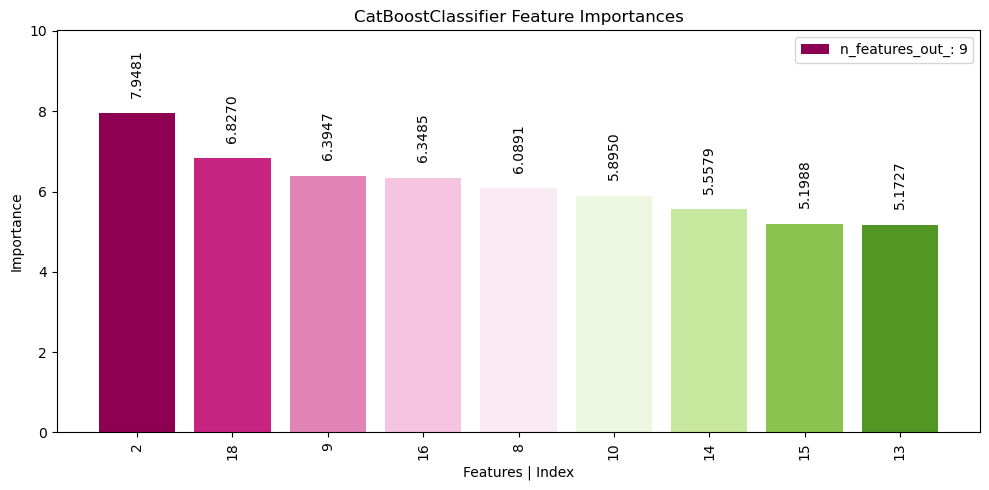

In [10]:
# Plot!
ax, features = skplt.estimators.plot_feature_importances(
    clf, 
    threshold=5,
    feature_names=range(X_train.shape[1])
);
features